Dataset description:
a) Финансы, индекс S&P 500 (kaggle.com), реальные данные
b) 
    Symbol: Уникальный биржевой символ или идентификатор тикера для каждой компании из списка S&P 500. (категории)
    Name: Официальное название или полное фирменное наименование каждой компании. (категории)
    Sector: сектор, к которому принадлежит компания, классифицирующий ее по определенным отраслевым группам в рамках S&P 500. (категории)
    Price: Текущая торговая цена акций компании. (числовой)
    Price/Earnings: отношение цены к прибыли (P/E), ключевой показатель оценки, указывающий на взаимосвязь между ценой акции
и ее прибылью на акцию. (числовой)
    Dividend Yield: Дивидендная доходность, представляющая собой отношение годовой выплаты дивидендов к текущей цене акций. (числовой)
    Earnings/Share: Прибыль на акцию (EPS), показатель прибыльности компании, рассчитываемый как прибыль,
деленная на количество акций, находящихся в обращении. (числовой)
    52 Week Low: самая низкая цена, по которой акции торговались за последние 52 недели. (числовой)
    52 Week High: самая высокая цена, по которой акции торговались за последние 52 недели. (числовой)
    Market Cap: Общая рыночная капитализация компании, представляющая собой произведение текущей цены акций и общего 
количества акций в обращении. (числовой)
    EBITDA: прибыль до вычета процентов, налогов, износа и амортизации, показатель операционной эффективности компании. (числовой)
    Price/Sales: отношение цены к продажам, которое сравнивает цену акции с выручкой компании на акцию. (числовой)
    Price/Book: соотношение цены к балансовой стоимости (P/B), сравнивающее цену акции с ее балансовой
стоимостью за акцию, показатель относительной стоимости акции. (числовой)
    SEC Filings: Информация о подаче компанией заявок в Комиссию по ценным бумагам и биржам США (SEC),
предоставляющая данные о прозрачности и соответствии требованиям. (категории)
c) Задачи анализа нет.

In [45]:
import pandas as pd
import matplotlib.pyplot as pl

Matplotlib is building the font cache; this may take a moment.


In [11]:
dataFrame = pd.read_csv('constituents-financials_csv.csv')
# убеждаемся, что данные считаны и с ними можно работать
dataFrame.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [31]:
# получим столбцы с типом numeric
cols = []
for col in dataFrame.columns:
    if (dataFrame[col].dtypes != 'object'):
        cols.append(col)
#числовые столбцы
print(cols)

['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']


In [28]:
# проверка на пропущенные значения
dataFrame[cols].isnull().mean()

Price             0.000000
Price/Earnings    0.003960
Dividend Yield    0.000000
Earnings/Share    0.000000
52 Week Low       0.000000
52 Week High      0.000000
Market Cap        0.000000
EBITDA            0.000000
Price/Sales       0.000000
Price/Book        0.015842
dtype: float64

In [29]:
# пропущенные значения есть, ищем сколько
print('Price/Earnings nulls: ' + str(dataFrame['Price/Earnings'].isnull().mean() * len(dataFrame['Price/Earnings'])))
print('Price/Book nulls: ' + str(dataFrame['Price/Book'].isnull().mean() * len(dataFrame['Price/Book'])))

Price/Earnings nulls: 2.0
Price/Book nulls: 8.0


Пропущенных значений меньше, чем 2% от всех данных. Данные параметры могут сильно варьироваться, в зависимости от компании. Брать среднее значение не совсем корректно в данном случае, а строить предсказательную модель не целесообразно ввиду малого количества пропусков. В ручную эти данные также не восстановить, потому как неизвестны параметры, по которым они рассчитываются. Поэтому принято решение убрать эти данные из датасета.

In [36]:
dataFrame.dropna(inplace=True)

In [39]:
# считаем среднее для каждого числового атрибута
dataFrame[cols].mean()

Price             1.041065e+02
Price/Earnings    2.465430e+01
Dividend Yield    1.901477e+00
Earnings/Share    3.815192e+00
52 Week Low       1.229858e+02
52 Week High      8.381205e+01
Market Cap        4.937665e+10
EBITDA            3.576406e+09
Price/Sales       3.953316e+00
Price/Book        1.449869e+01
dtype: float64

In [40]:
# ско для каждого числового атрибута
dataFrame[cols].std()

Price             1.353726e+02
Price/Earnings    4.076708e+01
Dividend Yield    1.541039e+00
Earnings/Share    5.529133e+00
52 Week Low       1.564804e+02
52 Week High      1.064974e+02
Market Cap        9.069162e+10
EBITDA            6.880742e+09
Price/Sales       3.485055e+00
Price/Book        8.983892e+01
dtype: float64

(array([446.,  39.,   4.,   2.,   0.,   2.,   0.,   1.,   0.,   1.]),
 array([   2.82 ,  183.144,  363.468,  543.792,  724.116,  904.44 ,
        1084.764, 1265.088, 1445.412, 1625.736, 1806.06 ]),
 <BarContainer object of 10 artists>)

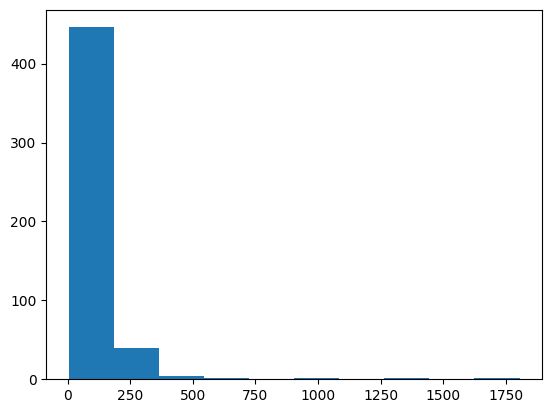

In [65]:
# гистограммы и выбросы
pl.hist(dataFrame['Price'])

<Axes: >

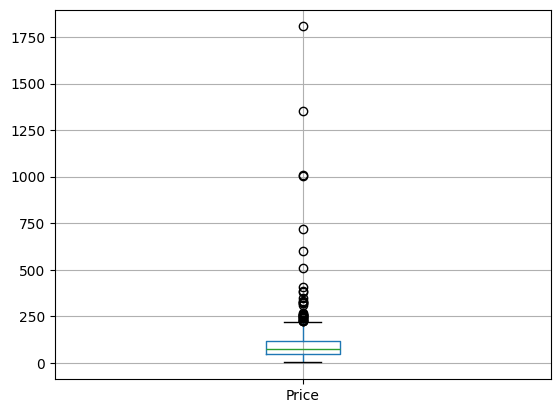

In [64]:
# здесь и далее точки на графике - это выбросы
dataFrame.boxplot('Price')

(array([  1.,   1.,   5., 468.,  11.,   4.,   2.,   2.,   0.,   1.]),
 array([-251.53 , -174.362,  -97.194,  -20.026,   57.142,  134.31 ,
         211.478,  288.646,  365.814,  442.982,  520.15 ]),
 <BarContainer object of 10 artists>)

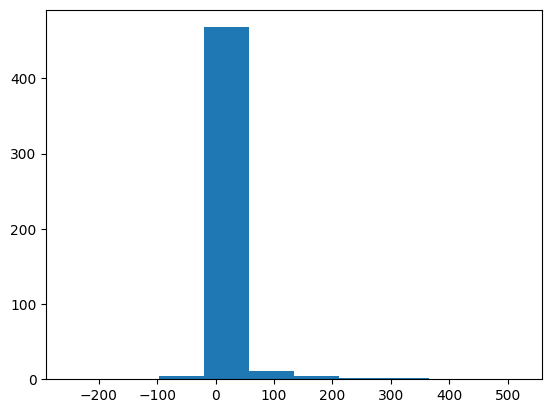

In [68]:
pl.hist(dataFrame['Price/Earnings'])

<Axes: >

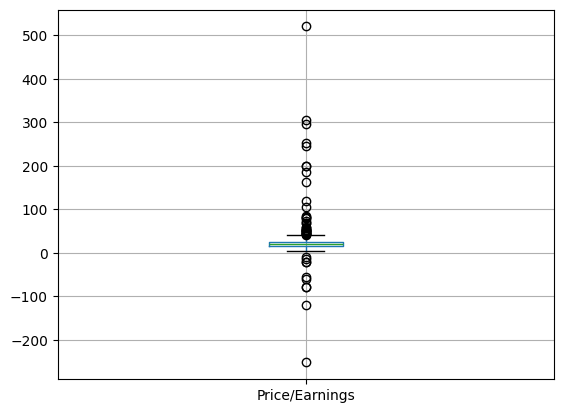

In [69]:
dataFrame.boxplot('Price/Earnings')

(array([183., 165., 100.,  31.,  11.,   3.,   1.,   0.,   0.,   1.]),
 array([ 0.       ,  1.2661196,  2.5322392,  3.7983588,  5.0644784,
         6.330598 ,  7.5967176,  8.8628372, 10.1289568, 11.3950764,
        12.661196 ]),
 <BarContainer object of 10 artists>)

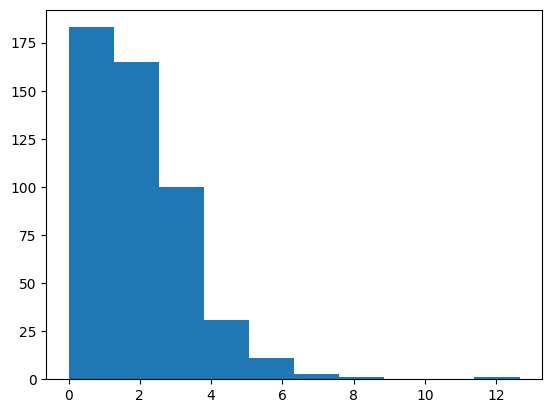

In [70]:
pl.hist(dataFrame['Dividend Yield'])

<Axes: >

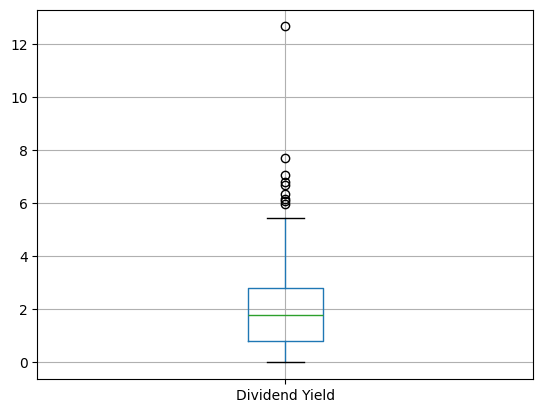

In [71]:
dataFrame.boxplot('Dividend Yield')

(array([  2.,   2.,   6., 234., 216.,  24.,   5.,   2.,   1.,   3.]),
 array([-24.62 , -17.749, -10.878,  -4.007,   2.864,   9.735,  16.606,
         23.477,  30.348,  37.219,  44.09 ]),
 <BarContainer object of 10 artists>)

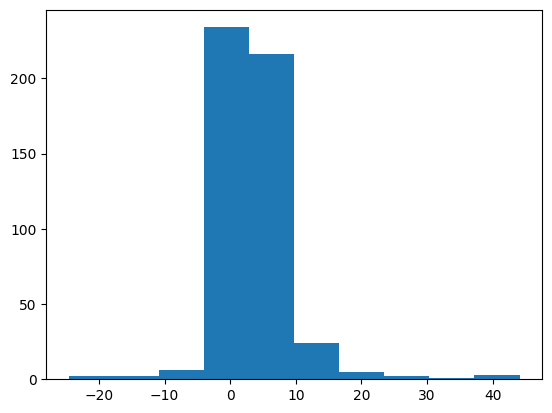

In [72]:
pl.hist(dataFrame['Earnings/Share'])

<Axes: >

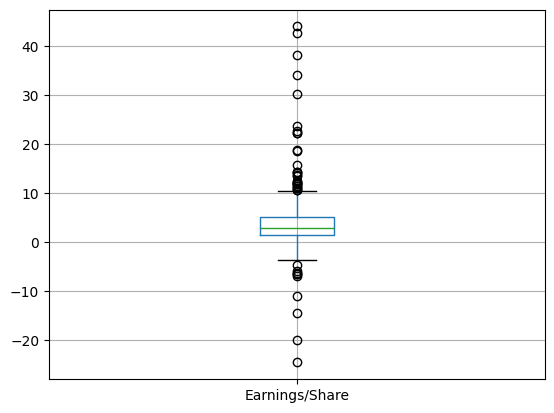

In [73]:
dataFrame.boxplot('Earnings/Share')

(array([441.,  42.,   6.,   2.,   0.,   2.,   0.,   1.,   0.,   1.]),
 array([   6.59,  212.73,  418.87,  625.01,  831.15, 1037.29, 1243.43,
        1449.57, 1655.71, 1861.85, 2067.99]),
 <BarContainer object of 10 artists>)

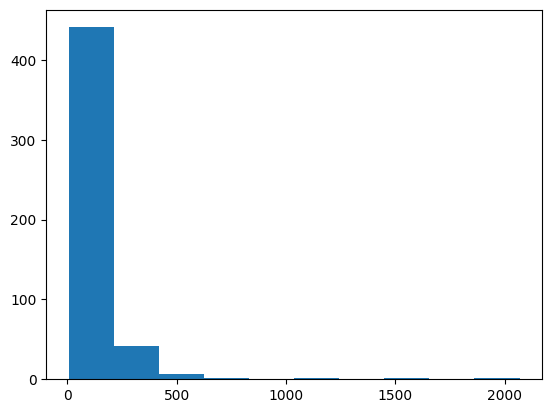

In [74]:
pl.hist(dataFrame['52 Week Low'])

<Axes: >

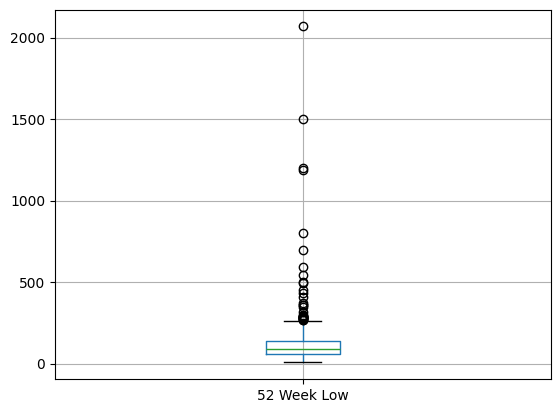

In [75]:
dataFrame.boxplot('52 Week Low')

(array([460.,  27.,   3.,   1.,   0.,   3.,   0.,   0.,   0.,   1.]),
 array([   2.8 ,  161.42,  320.04,  478.66,  637.28,  795.9 ,  954.52,
        1113.14, 1271.76, 1430.38, 1589.  ]),
 <BarContainer object of 10 artists>)

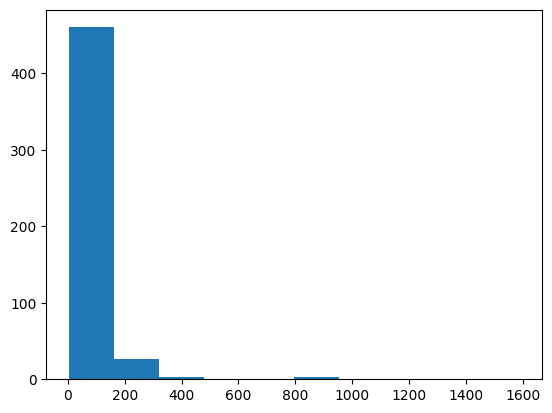

In [76]:
pl.hist(dataFrame['52 Week High'])

<Axes: >

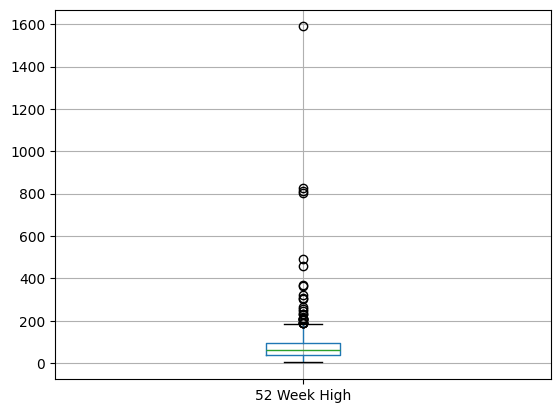

In [77]:
dataFrame.boxplot('52 Week High')

(array([428.,  36.,  17.,   5.,   3.,   0.,   1.,   0.,   3.,   2.]),
 array([2.62610212e+09, 8.33142953e+10, 1.64002489e+11, 2.44690682e+11,
        3.25378875e+11, 4.06067068e+11, 4.86755261e+11, 5.67443454e+11,
        6.48131648e+11, 7.28819841e+11, 8.09508034e+11]),
 <BarContainer object of 10 artists>)

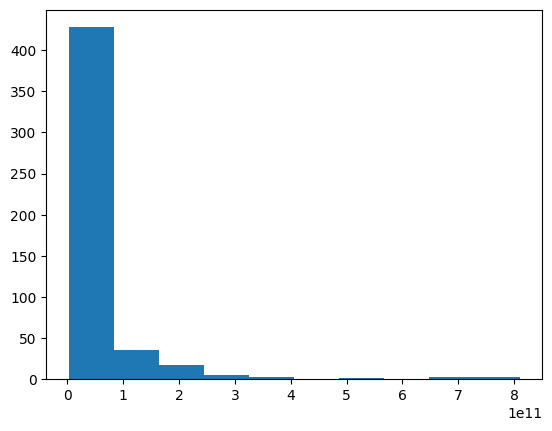

In [78]:
pl.hist(dataFrame['Market Cap'])

<Axes: >

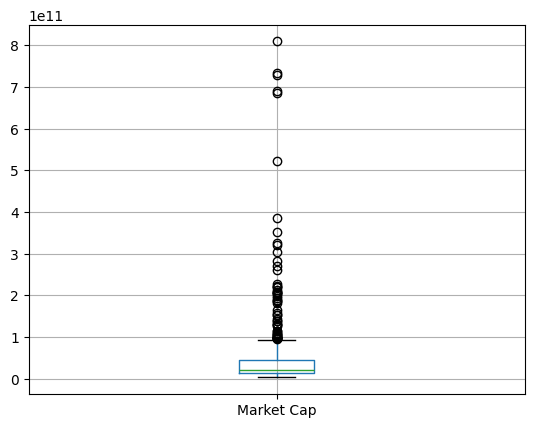

In [79]:
dataFrame.boxplot('Market Cap')

(array([367.,  99.,  14.,   6.,   4.,   2.,   2.,   0.,   0.,   1.]),
 array([-5.06700e+09,  3.37830e+09,  1.18236e+10,  2.02689e+10,
         2.87142e+10,  3.71595e+10,  4.56048e+10,  5.40501e+10,
         6.24954e+10,  7.09407e+10,  7.93860e+10]),
 <BarContainer object of 10 artists>)

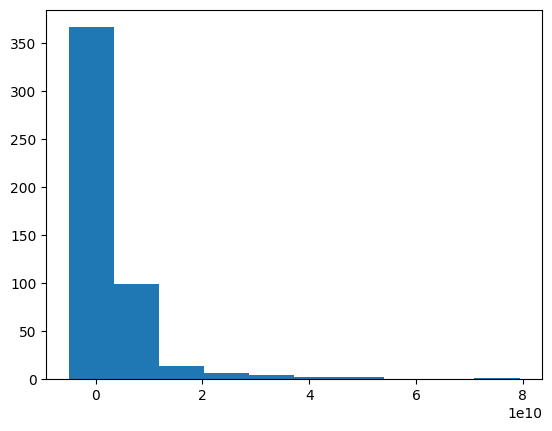

In [80]:
pl.hist(dataFrame['EBITDA'])

<Axes: >

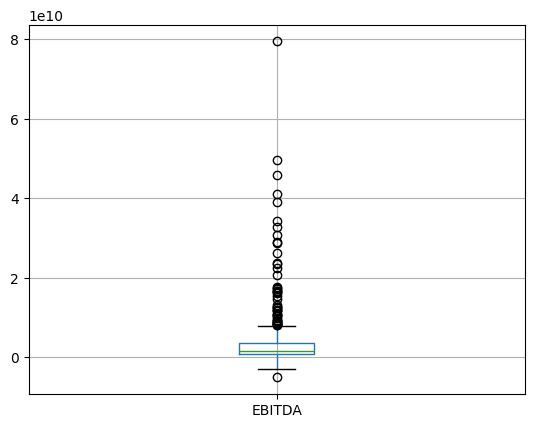

In [81]:
dataFrame.boxplot('EBITDA')

(array([184., 163.,  56.,  40.,  15.,  10.,  10.,  10.,   6.,   1.]),
 array([ 0.15318617,  2.14729695,  4.14140774,  6.13551852,  8.1296293 ,
        10.12374008, 12.11785087, 14.11196165, 16.10607243, 18.10018322,
        20.094294  ]),
 <BarContainer object of 10 artists>)

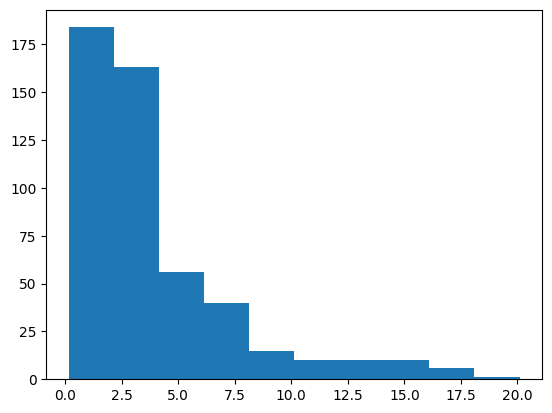

In [82]:
pl.hist(dataFrame['Price/Sales'])

<Axes: >

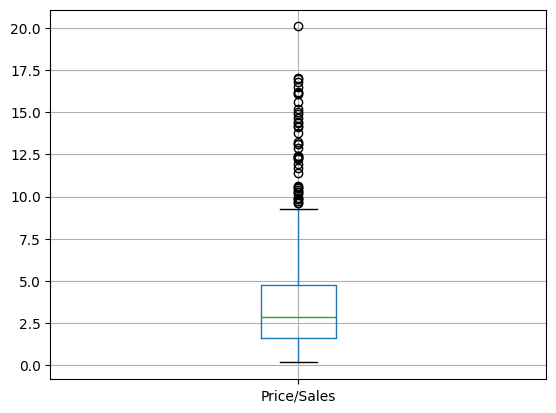

In [83]:
dataFrame.boxplot('Price/Sales')

(array([485.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([5.100000e-01, 1.407970e+02, 2.810840e+02, 4.213710e+02,
        5.616580e+02, 7.019450e+02, 8.422320e+02, 9.825190e+02,
        1.122806e+03, 1.263093e+03, 1.403380e+03]),
 <BarContainer object of 10 artists>)

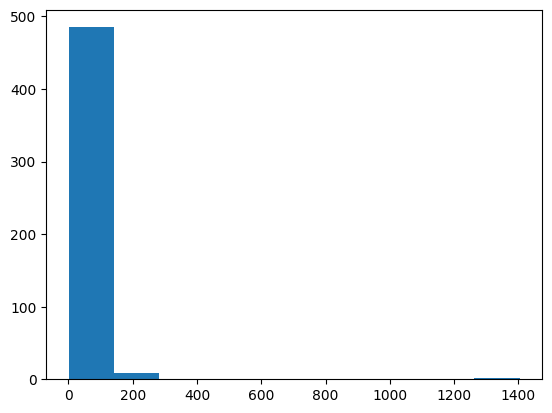

In [84]:
pl.hist(dataFrame['Price/Book'])

<Axes: >

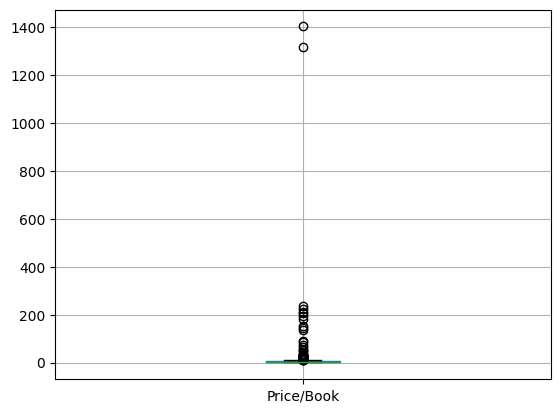

In [85]:
dataFrame.boxplot('Price/Book')

Из приведенных выше графиков видно, что датасет имеет большое число выбросов по всем атрибутам. Однако, это обусловлено особенностью данных. В индексе S&P500 собраны акции различных компаний, а значит и экономические параметры могут существенно различаться.

In [87]:
dataFrame[cols].corr()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Price,1.000000,0.199171,-0.245344,0.609033,0.995080,0.982766,0.407754,0.180636,0.181080,0.023509
Price/Earnings,0.199171,1.000000,-0.200884,0.008879,0.189760,0.147635,0.132557,0.000812,0.187009,0.000366
Dividend Yield,-0.245344,-0.200884,1.000000,-0.088261,-0.245423,-0.209074,-0.026873,0.122394,-0.081115,0.089067
Earnings/Share,0.609033,0.008879,-0.088261,1.000000,0.606107,0.623021,0.194429,0.177936,-0.039326,0.031638
52 Week Low,0.995080,0.189760,-0.245423,0.606107,1.000000,0.984887,0.399832,0.176773,0.188494,0.023175
52 Week High,0.982766,0.147635,-0.209074,0.623021,0.984887,1.000000,0.375849,0.179295,0.172875,0.017645
Market Cap,0.407754,0.132557,-0.026873,0.194429,0.399832,0.375849,1.000000,0.770722,0.093931,0.034220
EBITDA,0.180636,0.000812,0.122394,0.177936,0.176773,0.179295,0.770722,1.000000,-0.037926,0.035304
Price/Sales,0.181080,0.187009,-0.081115,-0.039326,0.188494,0.172875,0.093931,-0.037926,1.000000,0.012300
Price/Book,0.023509,0.000366,0.089067,0.031638,0.023175,0.017645,0.034220,0.035304,0.012300,1.000000


array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Price/Earnings', ylabel='Price'>,
        <Axes: xlabel='Dividend Yield', ylabel='Price'>,
        <Axes: xlabel='Earnings/Share', ylabel='Price'>,
        <Axes: xlabel='52 Week Low', ylabel='Price'>,
        <Axes: xlabel='52 Week High', ylabel='Price'>,
        <Axes: xlabel='Market Cap', ylabel='Price'>,
        <Axes: xlabel='EBITDA', ylabel='Price'>,
        <Axes: xlabel='Price/Sales', ylabel='Price'>,
        <Axes: xlabel='Price/Book', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Price/Earnings'>,
        <Axes: xlabel='Price/Earnings', ylabel='Price/Earnings'>,
        <Axes: xlabel='Dividend Yield', ylabel='Price/Earnings'>,
        <Axes: xlabel='Earnings/Share', ylabel='Price/Earnings'>,
        <Axes: xlabel='52 Week Low', ylabel='Price/Earnings'>,
        <Axes: xlabel='52 Week High', ylabel='Price/Earnings'>,
        <Axes: xlabel='Market Cap', ylabel='Price/Earnings'>,
        <Axes: xla

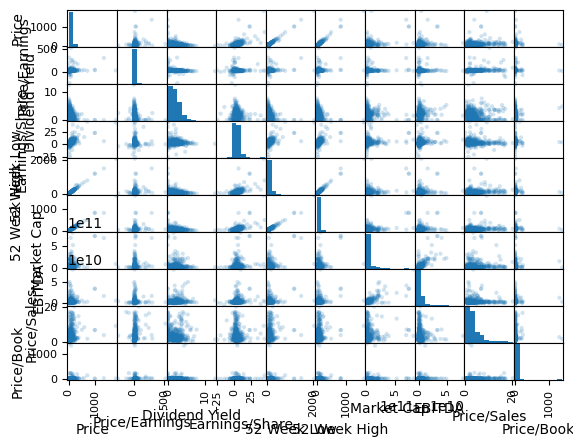

In [91]:
pd.plotting.scatter_matrix(dataFrame[cols], alpha=0.2)

Проанализировав полученные выше значения и графики, можно сделать выводы.
Price: сильно коррелирует с Earnings/Share, 52 Week Low, 52 Week High. Слабо коррелирует с Price/Earnings, Dividend Yield, Market Cap, EBITDA, Price/Sales и не коррелирует с Price/Book.
Price/Earnings: слабо коррелирует с Dividend Yield, 52 Week Low, 52 Week High, Market Cap, Price/Sales и не коррелирует с Earnings/Share, EBITDA и Price/Book.
Dividend Yield: слабо коррелирует с 52 Week Low, 52 Week High, EBITDA и не коррелирует с Earnings/Share, Market Cap, Price/Sales и Price/Book.
Earnings/Share: сильно коррелирует с 52 Week Low, 52 Week High, слабо коррелирует с Market Cap, EBITDA и не коррелирует с Price/Sales, Price/Book.
52 Week Low: сильно коррелилрует с 52 Week High, слабо коррелирует с Market Cap, EBITDA, Price/Sales и не коррелирует с Price/Book.
52 Week High: слабо коррелирует с Market Cap, EBITDA, Price/Sales и не коррелирует с Price/Book.
Market Cap: сильно коррелилрует с EBITDA, почти не коррелирует с Price/Sales и Price/Book.
EBITDA: почти не коррелирует с Price/Sales, Price/Book.
Price/Sales не коррелирует с Price/Book.

Такие показатели в полное мере соответствуют положению в экономике. Так, если посмотреть на корреляцию 52 Week Low и 52 Week High, то она почти равна 1, ведь это похожие параметры, показывающие минимальную и максимальную цену на акции в течении года. Также, если обратить внимание на Earnings/Share и Price, то они также имеют корреляцию 0.6, из чего можно сделать вывод, что "прибыль на акцию" влияет на цену акции. А, например, параметр Market Cap имеет высокую корреляцию с EBITDA (доход до вычета всех расходов), что также говорит нам - чем больше компания, тем больше её доход.
Что примечательно, пусть и слабо, но отрицательно коррелирует цена акции с количеством дивидентов на акцию. То есть, чем выше стоимость акции, тем ниже выплаты по дивидентам.
Также можно обратить внимание на Price/Book, который слабо коррелирует с любым из атрибутов. Связано это с тем, как получается этот параметр в реальной жизни. Это отношение цены акции на данный момент, к её балансовой стоимости. То есть это механизм регулирования цены акции, а значит и связи с другими атрибутами у него быть не должно, в чём мы и убедились.